# Analysis of GPCR helices bind

In [2]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
data = pd.read_csv('GPCR-TM-table_new_version.csv', index_col=None)
data.head()

,index,GPCR,Family,Class,Species,pdb_active,pdb_inactive,chain_a,chain_i,TM1_active,...,TM7_best_rotation_axis_a,TM7_best_angle_a,TM7_best_RMSD(T_A),TM7_pro_point_resi,TM7_pro_rotation_axis_b,TM7_pro_angle_b,TM7_pro_rotation_axis_a,TM7_pro_angle_a,TM7_pro_RMSD(T_A),TM7_NofPRO
0,0,5-HT2C receptor,5-Hydroxytryptamine receptors,Class A (Rhodopsin),Human,6bqg,6bqh,A,A,60-81,...,"(0.067615658363, 0.653279105236, 0.279105236401)",1.514036,1.122865,365,"(0.17288941736, 0.0238287752675, 0.803281807372)",2.028398900516339,"(0.00675768376375, 0.00375102532891, 0.9894912...",8.194254277897604,1.0591295957565308,1
1,1,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqs,3uon,A,A,19-51,...,"(0.0476475517778, 0.0866083102701, 0.865744137...",8.337947,1.466749,437,"(0.197427652733, 0.138263665595, 0.664308681672)",0.5516067326545776,"(0.014591919429, 0.154966615387, 0.830441465184)",37.96046060936742,1.3356281518936157,2
2,2,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqt,3uon,A,A,19-51,...,"(0.00104275286757, 0.912408759124, 0.086548488...",5.448265,1.771489,437,"(0.310854710429, 0.156491542511, 0.532653747059)",1.3216762342703745,"(0.0041326891396, 0.180686381468, 0.815180929392)",43.75131474412799,1.2623016834259033,2
3,3,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3eml,A,A,2-34,...,"(0.0519695213484, 0.0865905333764, 0.861439945...",4.463871,1.767232,285,"(0.570356402037, 0.41507322899, 0.0145703689735)",3.9459807352822085,"(0.124492356805, 0.281441197122, 0.594066446073)",32.23299037729215,1.3362762928009033,2
4,4,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3pwh,A,A,2-34,...,"(0.12706664061, 0.526636701192, 0.346296658198)",3.756781,2.229649,285,"(0.257525361716, 0.0854814568435, 0.65699318144)",2.169522844487806,"(0.040210495183, 0.449529029413, 0.510260475404)",37.073174907763004,1.7543768882751465,2


## Dataset preparation
*Returns dataset with relaive position of rotation points*

In [10]:
import numpy as np

def get_calc_df(tm):
    
    diff = []
    length = []
    from_end = []
    family_names = []
    new_index = []
    rmsd_diff = []
    n_of_pro = []
    
    tm_name = 'TM' + str(tm) + '_'
    
    for idx in data['index']:
        
        if data[tm_name + 'pro_rotation_axis_b'][idx] != 'noPRO' and data[tm_name + 'pro_rotation_axis_b'][idx] != 'PRO is in the end':
            diff.append(int(data[tm_name + 'best_point_resi'][idx]) - int(data[tm_name + 'pro_point_resi'][idx]))
            length.append(int(data[tm_name + 'inactive'][idx].split('-')[1]) - int(data[tm_name + 'inactive'][idx].split('-')[0]))
            from_end.append(int(data[tm_name + 'inactive'][idx].split('-')[1]) - int(data[tm_name + 'best_point_resi'][idx]))
            family_names.append(data['Family'][idx].decode('utf-8'))
            new_index.append(idx)
            rmsd_diff.append(float(data[tm_name + 'pro_RMSD(T_A)'][idx]) - float(data[tm_name + 'best_RMSD(T_A)'][idx]))
            n_of_pro.append(float(data[tm_name + 'NofPRO'][idx]))

    diff = np.array(diff)
    length = np.array(length)
    from_end = np.array(from_end)
    family_names = np.array(family_names)
    new_index = np.array(new_index)
    rmsd_diff = np.array(rmsd_diff)
    n_of_pro = np.array(n_of_pro)
    
    calc = pd.DataFrame({'index': new_index, 'N_of_PRO': n_of_pro, 'Family': family_names, 'best-pro_TM' + str(tm): diff, 'rmsd_diff': rmsd_diff,'length_inactive': length, 'best_from_end_i': from_end})
    return calc

## Histogra Analysis
### Histograms of distance between best rotation point and proline rotation point

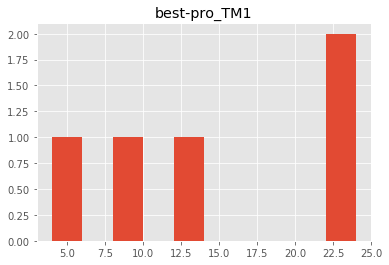

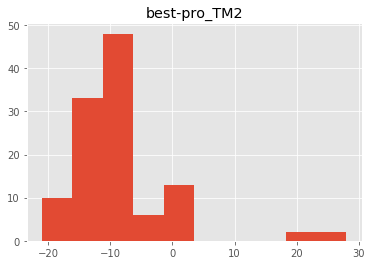

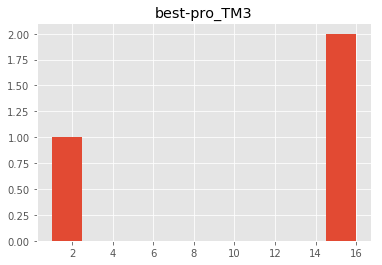

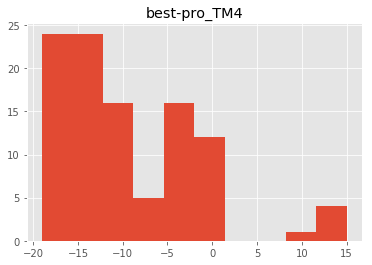

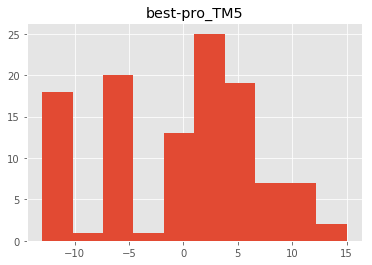

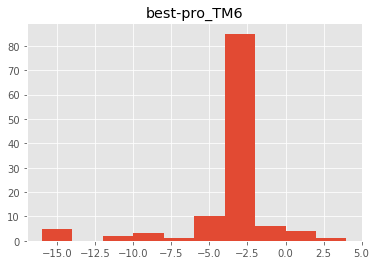

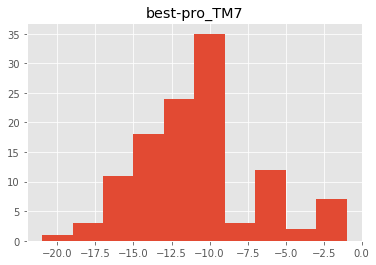

In [17]:
for tm in range (1, 8):
    result_data = get_calc_df(tm)
    result_data.hist(column='best-pro_TM' + str(tm))

#    plt.savefig('/home/andrew/Documents/Diploma/GPCRSampling/images/best-pro_TM_new' + str(tm) + '.png', dpi=150, format='png')

### Histogram of RMSD distribution

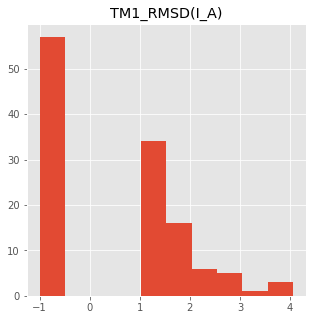

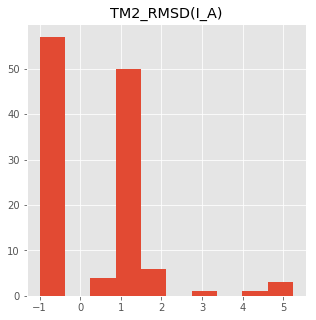

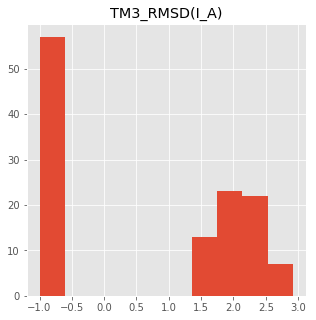

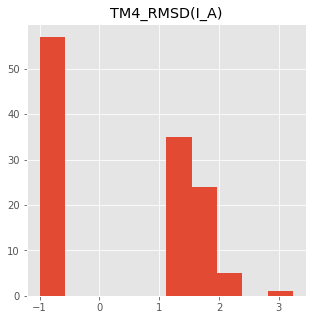

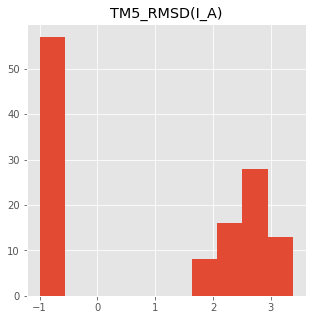

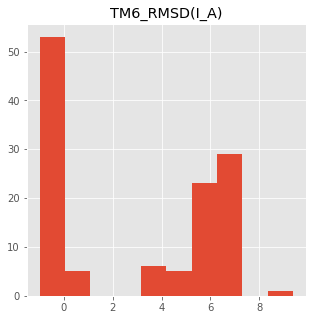

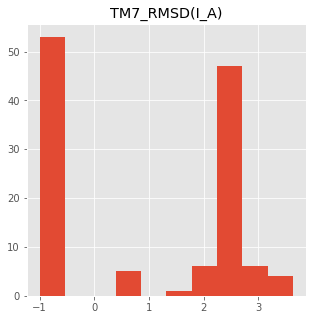

In [7]:
for tm in range (1, 8):
    name = 'TM' + str(tm) + '_RMSD(I_A)'
    data.hist(column=name, figsize=(5, 5))
    plt.savefig('/home/andrew/Documents/Diploma/GPCRSampling/images/RMSD_I_A_old' + str(tm) + '.png', dpi=150, format='png')

## Specific GPCR pair and specific TM analysis

In [10]:
res_data = pd.read_csv('aligned_residues.csv')

Text(0.5,0,'residue index')

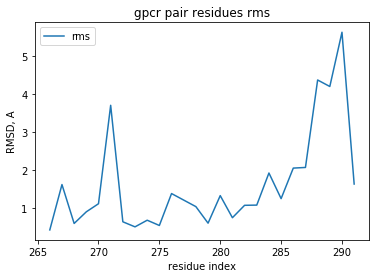

In [16]:
res_data.plot(x = 'resi', y = 'rms')
pylab.title('gpcr pair residues rms')
pylab.ylabel('RMSD, A')
pylab.xlabel('residue index')

### Residue data smoother

In [8]:
def smooth_data(res_data, step):
    sum_rms = []
    for idx in res_data.index:
        if (idx + step - 1) in res_data_2.index:
            s = sum(res_data_2['rms'][idx:idx + step]) / float(step)
            sum_rms.append([idx + res_data['resi'][0], s])

    X = [x[0] for x in sum_rms]
    Y = [y[1] for y in sum_rms]
    
    return X, Y

Text(0,0.5,'RMSD, A')

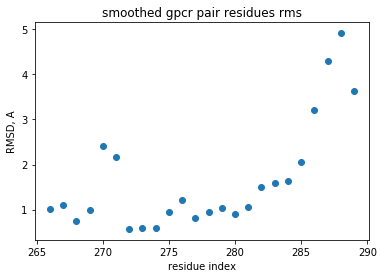

In [19]:
X, Y = smooth_data(res_data, 2)
pylab.scatter(X, Y)
pylab.title('smoothed gpcr pair residues rms')
pylab.xlabel('residue index')
pylab.ylabel('RMSD, A')

### Determine residue index, which corresponds to minimal rmsd

In [20]:
def get_min_resi(X, Y):
    y_min = min(Y)
    
    for x, y in zip(X, Y):
        if y == y_min:
            return x

In [21]:
print min(Y), get_min_resi(X, Y)

0.563048854470253 272.0
